### PERSONA DEFINITIONS
- Cluster 0 → "The Driven Learner"  — High Engagement / Low CLV
- Cluster 1 → "The Passive Payer"   — Low Engagement  / Mid CLV
- Cluster 2 → "The Champion"        — High Engagement / High CLV

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Load Data & Refit Model

In [4]:
df = pd.read_csv("/content/customer_segmentation_clustered.csv")

In [5]:
df.head()

,minutes_watched,CLV,region,channel,is_free_user,is_zero_engagement,log_minutes_watched,log_clv,engagement_tier,clv_tier,engagement_value_ratio,log_minutes_watched_scaled,log_clv_scaled,cluster
0,3197.0,205.42,2,4,0,0,8.070281,5.329913,4,4,2.764684,1.050953,1.048157,2
1,63.0,149.99,0,1,0,0,4.158883,5.017214,1,3,2.764684,-1.042144,0.609529,1
2,605.0,119.00,2,2,0,0,6.406880,4.787492,3,2,2.764684,0.160821,0.287295,2
3,20.0,240.00,2,4,0,0,3.044522,5.484797,1,4,2.764684,-1.638470,1.265415,1
4,245.0,184.36,1,4,0,0,5.505332,5.222300,2,4,2.764684,-0.321622,0.897207,2


In [6]:
X = df[['log_minutes_watched_scaled', 'log_clv_scaled']].values

In [7]:
# Refit with n_init=50 for maximum centroid stability
km = KMeans(n_clusters=3, init='k-means++', n_init=50, random_state=42)
df['cluster'] = km.fit_predict(X)

In [8]:
REGION_MAP  = {0: 'US/CA/UK/AU', 1: 'W. Europe', 2: 'Rest of World'}

CHANNEL_MAP = {1: 'Google', 2: 'Facebook', 3: 'YouTube', 4: 'LinkedIn',
               5: 'Twitter', 6: 'Instagram', 7: 'Friend', 8: 'Other'}

ENG_MAP     = {0: 'Dormant', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Power'}

CLV_MAP     = {0: 'Zero', 1: 'Low', 2: 'Mid-Low', 3: 'Mid-High', 4: 'Premium'}

### Persona Definitions

Assignment logic: \
- Engagement axis (minutes_watched): primary behavioural signal
- Monetary axis  (CLV):             primary revenue signal
- Region / Channel:                 descriptor / targeting signal

In [10]:
PERSONA_MAP = {
    0: 'The Driven Learner',   # High engagement, Low CLV
    1: 'The Passive Payer',    # Low engagement,  Mid CLV
    2: 'The Champion',         # High engagement, High CLV
}

PERSONA_COLORS = {
    0: '#E76F51',   # warm orange  — Driven Learner
    1: '#048A81',   # teal         — Passive Payer
    2: '#9B5DE5',   # purple       — Champion
}

In [11]:
df['persona'] = df['cluster'].map(PERSONA_MAP)

print(f"\n  Persona label mapping:")
for c, name in PERSONA_MAP.items():
    n = (df['cluster'] == c).sum()
    print(f"    Cluster {c} → {name:<25} (n={n:,}, {n/len(df)*100:.1f}%)")


  Persona label mapping:
    Cluster 0 → The Driven Learner        (n=1,162, 30.7%)
    Cluster 1 → The Passive Payer         (n=929, 24.5%)
    Cluster 2 → The Champion              (n=1,700, 44.8%)


### Full Statistical Profile Per Persona

In [12]:
for c in range(3):
    mask = df['cluster'] == c
    sub  = df[mask]
    print(f"\n  ── {PERSONA_MAP[c]}  (Cluster {c}, n={mask.sum():,}, "
          f"{mask.sum()/len(df)*100:.1f}%) ──")
    print(f"    minutes_watched : mean={sub['minutes_watched'].mean():.0f}  "
          f"median={sub['minutes_watched'].median():.0f}  "
          f"std={sub['minutes_watched'].std():.0f}")
    print(f"    CLV             : mean=${sub['CLV'].mean():.2f}  "
          f"median=${sub['CLV'].median():.2f}  "
          f"std=${sub['CLV'].std():.2f}")
    print(f"    Revenue contrib : ${sub['CLV'].sum():,.0f}  "
          f"({sub['CLV'].sum()/df['CLV'].sum()*100:.1f}% of total)")
    print(f"    Engagement tiers: "
          f"{sub['engagement_tier'].value_counts().sort_index().rename(ENG_MAP).to_dict()}")
    print(f"    CLV tiers       : "
          f"{sub['clv_tier'].value_counts().sort_index().rename(CLV_MAP).to_dict()}")
    print(f"    Region split    : "
          f"{sub['region'].value_counts().sort_index().rename(REGION_MAP).to_dict()}")
    print(f"    Top channel     : "
          f"{CHANNEL_MAP[sub['channel'].value_counts().idxmax()]}")
    print(f"    Channel split   : "
          f"{sub['channel'].value_counts().sort_index().rename(CHANNEL_MAP).to_dict()}")


  ── The Driven Learner  (Cluster 0, n=1,162, 30.7%) ──
    minutes_watched : mean=2252  median=692  std=9780
    CLV             : mean=$48.75  median=$62.55  std=$19.67
    Revenue contrib : $56,649  (12.6% of total)
    Engagement tiers: {'Dormant': 3, 'Low': 54, 'Medium': 389, 'High': 382, 'Power': 334}
    CLV tiers       : {'Zero': 10, 'Low': 914, 'Mid-Low': 238}
    Region split    : {'US/CA/UK/AU': 205, 'W. Europe': 67, 'Rest of World': 890}
    Top channel     : YouTube
    Channel split   : {'Google': 205, 'Facebook': 114, 'YouTube': 274, 'LinkedIn': 206, 'Twitter': 32, 'Instagram': 92, 'Friend': 165, 'Other': 74}

  ── The Passive Payer  (Cluster 1, n=929, 24.5%) ──
    minutes_watched : mean=75  median=61  std=62
    CLV             : mean=$126.35  median=$119.00  std=$51.49
    Revenue contrib : $117,381  (26.1% of total)
    Engagement tiers: {'Dormant': 32, 'Low': 587, 'Medium': 310}
    CLV tiers       : {'Low': 127, 'Mid-Low': 357, 'Mid-High': 232, 'Premium': 213}
   

### Cross-Tabulation — Region × Cluster

In [15]:
region_cluster = pd.crosstab(
    df['region'].map(REGION_MAP), df['cluster'],
    normalize='index'
).round(3) * 100

region_cluster.columns = [PERSONA_MAP[c] for c in region_cluster.columns]
print(region_cluster.to_string())

               The Driven Learner  The Passive Payer  The Champion
region                                                            
Rest of World                44.8               19.1          36.0
US/CA/UK/AU                  15.2               33.1          51.7
W. Europe                    14.6               22.6          62.8


**Interpretation:** \
  → W. Europe produces the highest Champion rate (62.8%) \
  → Rest of World skews heavily toward Driven Learner (44.8%) — high engagement, low conversion \
  → US/CA/UK/AU over-indexes in Passive Payer (33.1%) — high purchasing power but disengaged

### Cross-Tabulation — Channel × Cluster

In [20]:
channel_cluster = pd.crosstab(
    df['channel'].map(CHANNEL_MAP), df['cluster'],
    normalize='index'
).round(3) * 100
channel_cluster.columns = [PERSONA_MAP[c] for c in channel_cluster.columns]
print(channel_cluster.to_string())

           The Driven Learner  The Passive Payer  The Champion
channel                                                       
Facebook                 37.6               21.1          41.3
Friend                   34.7               20.0          45.3
Google                   30.8               24.2          45.0
Instagram                32.4               21.8          45.8
LinkedIn                 32.2               28.4          39.4
Other                    25.8               30.7          43.6
Twitter                  55.2               25.9          19.0
YouTube                  25.4               24.3          50.3


 **Interpretation:** \
  → YouTube produces the highest Champion rate (50.3%) — best ROI acquisition channel \
  → Twitter skews heavily toward Driven Learner (55.2%) — low CLV; reduce spend \
  → LinkedIn over-indexes in Passive Payer (28.4%) — high-intent but disengaged post-purchase \
  → Friend referrals produce strong Champions (45.3%) — invest in referral programme

### Marketing Strategy — Per Persona

In [21]:
strategy = {
    0: {
        'persona'  : 'The Driven Learner  (Cluster 0)',
        'headline' : 'Convert engagement into revenue',
        'priority' : 'UPSELL / CONVERSION',
        'kpi'      : 'Free-to-paid conversion rate, ARPU uplift',
        'actions'  : [
            'Regional pricing campaigns — Rest of World users are price-sensitive; '
            'offer localised pricing tiers or purchasing power parity (PPP) discounts',
            'Trigger upsell nudge after certificate completion — highest intent moment',
            'LinkedIn + Friend referral incentives — these channels are proportionally '
            'strong in this cluster; offer referral discounts to activate word-of-mouth',
            'Progress-based email sequences — "You\'ve watched 500 min, unlock premium '
            'for $X/month" personalised offers',
            'A/B test annual plan promotion — lower monthly equivalent breaks price barrier',
        ]
    },
    1: {
        'persona'  : 'The Passive Payer  (Cluster 1)',
        'headline' : 'Re-engage before they churn',
        'priority' : 'RETENTION / RE-ENGAGEMENT',
        'kpi'      : 'Churn rate reduction, 30-day active rate, session frequency',
        'actions'  : [
            'Deploy churn prediction model — flag users inactive for 14+ days and '
            'trigger automated re-engagement flow immediately',
            'Personalised course recommendations — reduce friction with curated '
            '"3 courses for your goals" emails based on enrolment history',
            'Gamification — introduce learning streaks, badges, and weekly goals '
            'with push notifications to rebuild habit loop',
            'US/CA/UK/AU-focused campaigns — this region dominates the persona; '
            'localise content in English and run timezone-aware push sequences',
            'Win-back discount if inactive 30+ days — limited-time offer "Resume '
            'your learning — 20% off next renewal"',
        ]
    },
    2: {
        'persona'  : 'The Champion  (Cluster 2)',
        'headline' : 'Protect, expand, and replicate',
        'priority' : 'LOYALTY / ADVOCACY / ACQUISITION',
        'kpi'      : 'LTV growth, NPS, referral rate, look-alike acquisition CPA',
        'actions'  : [
            'Loyalty programme — early course access, exclusive Q&As with instructors, '
            'and loyalty badges for 1yr+ subscribers; reduce price sensitivity',
            'Ambassador / referral programme — highest NPS potential; incentivise '
            'sharing with free month extensions or co-branded certificates',
            'Upsell to annual or team plans — Champions have demonstrated commitment; '
            'offer 20-30% annual discount to lock in LTV',
            'YouTube look-alike acquisition — YouTube is the dominant channel for '
            'Champions (50.3%); build look-alike audiences in YouTube Ads targeting '
            'users matching Champion demographics',
            'Feature in social proof — testimonials, case studies, course completion '
            'stories; Champions are the platform\'s most credible voice',
        ]
    },
}

for c, s in strategy.items():
    print(f"\n  {'='*55}")
    print(f"  {s['persona']}")
    print(f"  Priority : {s['priority']}")
    print(f"  Goal     : {s['headline']}")
    print(f"  KPIs     : {s['kpi']}")
    print(f"  Actions  :")
    for i, a in enumerate(s['actions'], 1):
        print(f"    {i}. {a}")


  The Driven Learner  (Cluster 0)
  Priority : UPSELL / CONVERSION
  Goal     : Convert engagement into revenue
  KPIs     : Free-to-paid conversion rate, ARPU uplift
  Actions  :
    1. Regional pricing campaigns — Rest of World users are price-sensitive; offer localised pricing tiers or purchasing power parity (PPP) discounts
    2. Trigger upsell nudge after certificate completion — highest intent moment
    3. LinkedIn + Friend referral incentives — these channels are proportionally strong in this cluster; offer referral discounts to activate word-of-mouth
    4. Progress-based email sequences — "You've watched 500 min, unlock premium for $X/month" personalised offers
    5. A/B test annual plan promotion — lower monthly equivalent breaks price barrier

  The Passive Payer  (Cluster 1)
  Priority : RETENTION / RE-ENGAGEMENT
  Goal     : Re-engage before they churn
  KPIs     : Churn rate reduction, 30-day active rate, session frequency
  Actions  :
    1. Deploy churn prediction m

### Budget Allocation Recommendation

In [23]:
print("\n" + "=" * 65)
print("MARKETING BUDGET ALLOCATION RECOMMENDATION")
print("=" * 65)
print("""
  Based on revenue contribution and strategic priority:

  Cluster 2 – The Champion       → 45% of budget
    Rationale: Highest LTV, 61.3% of revenue. Protect and expand.
    Spend on: Loyalty, referral programme, YouTube look-alike ads.

  Cluster 0 – The Driven Learner → 35% of budget
    Rationale: Largest upsell opportunity. 30.7% of users, only 12.6%
    of revenue — significant monetisation gap. Highest ROI if converted.
    Spend on: Regional pricing, conversion campaigns, certificate triggers.

  Cluster 1 – The Passive Payer  → 20% of budget
    Rationale: Already monetised (26.1% revenue) but high churn risk.
    Spend on: Re-engagement automation (low marginal cost), churn model.
""")


MARKETING BUDGET ALLOCATION RECOMMENDATION

  Based on revenue contribution and strategic priority:

  Cluster 2 – The Champion       → 45% of budget
    Rationale: Highest LTV, 61.3% of revenue. Protect and expand.
    Spend on: Loyalty, referral programme, YouTube look-alike ads.

  Cluster 0 – The Driven Learner → 35% of budget
    Rationale: Largest upsell opportunity. 30.7% of users, only 12.6%
    of revenue — significant monetisation gap. Highest ROI if converted.
    Spend on: Regional pricing, conversion campaigns, certificate triggers.

  Cluster 1 – The Passive Payer  → 20% of budget
    Rationale: Already monetised (26.1% revenue) but high churn risk.
    Spend on: Re-engagement automation (low marginal cost), churn model.



### Channel Budget Recommendation

In [24]:
print("=" * 65)
print("ACQUISITION CHANNEL BUDGET RECOMMENDATION")
print("=" * 65)
print("""
  INCREASE SPEND:
    YouTube    — 50.3% Champion rate. Best acquisition ROI.
    Friend     — 45.3% Champion rate. Low CPA, high LTV referrals.
    Google     — 45.0% Champion rate. Scalable with intent targeting.

  MAINTAIN SPEND:
    Facebook   — 41.3% Champion, broad reach.
    Instagram  — 45.8% Champion, strong for visual learners.

  REDUCE SPEND:
    Twitter    — 55.2% Driven Learner, lowest CLV per acquisition.
                 High engagement-to-CLV gap. Reduce paid spend, retain
                 organic presence only.
    LinkedIn   — 39.4% Champion but 28.4% Passive Payer. Monitor
                 post-purchase engagement; improve onboarding for LinkedIn
                 cohort specifically.
""")

ACQUISITION CHANNEL BUDGET RECOMMENDATION

  INCREASE SPEND:
    YouTube    — 50.3% Champion rate. Best acquisition ROI.
    Friend     — 45.3% Champion rate. Low CPA, high LTV referrals.
    Google     — 45.0% Champion rate. Scalable with intent targeting.

  MAINTAIN SPEND:
    Facebook   — 41.3% Champion, broad reach.
    Instagram  — 45.8% Champion, strong for visual learners.

  REDUCE SPEND:
    Twitter    — 55.2% Driven Learner, lowest CLV per acquisition.
                 High engagement-to-CLV gap. Reduce paid spend, retain
                 organic presence only.
    LinkedIn   — 39.4% Champion but 28.4% Passive Payer. Monitor
                 post-purchase engagement; improve onboarding for LinkedIn
                 cohort specifically.



### Save Labelled Dataset

In [28]:
df.to_csv("customer_segmentation_clustered.csv", index=False)
print(f"  Labelled dataset saved")
print(f"  Columns added         : cluster, persona")

  Labelled dataset saved
  Columns added         : cluster, persona


### Visualisation Dashboard

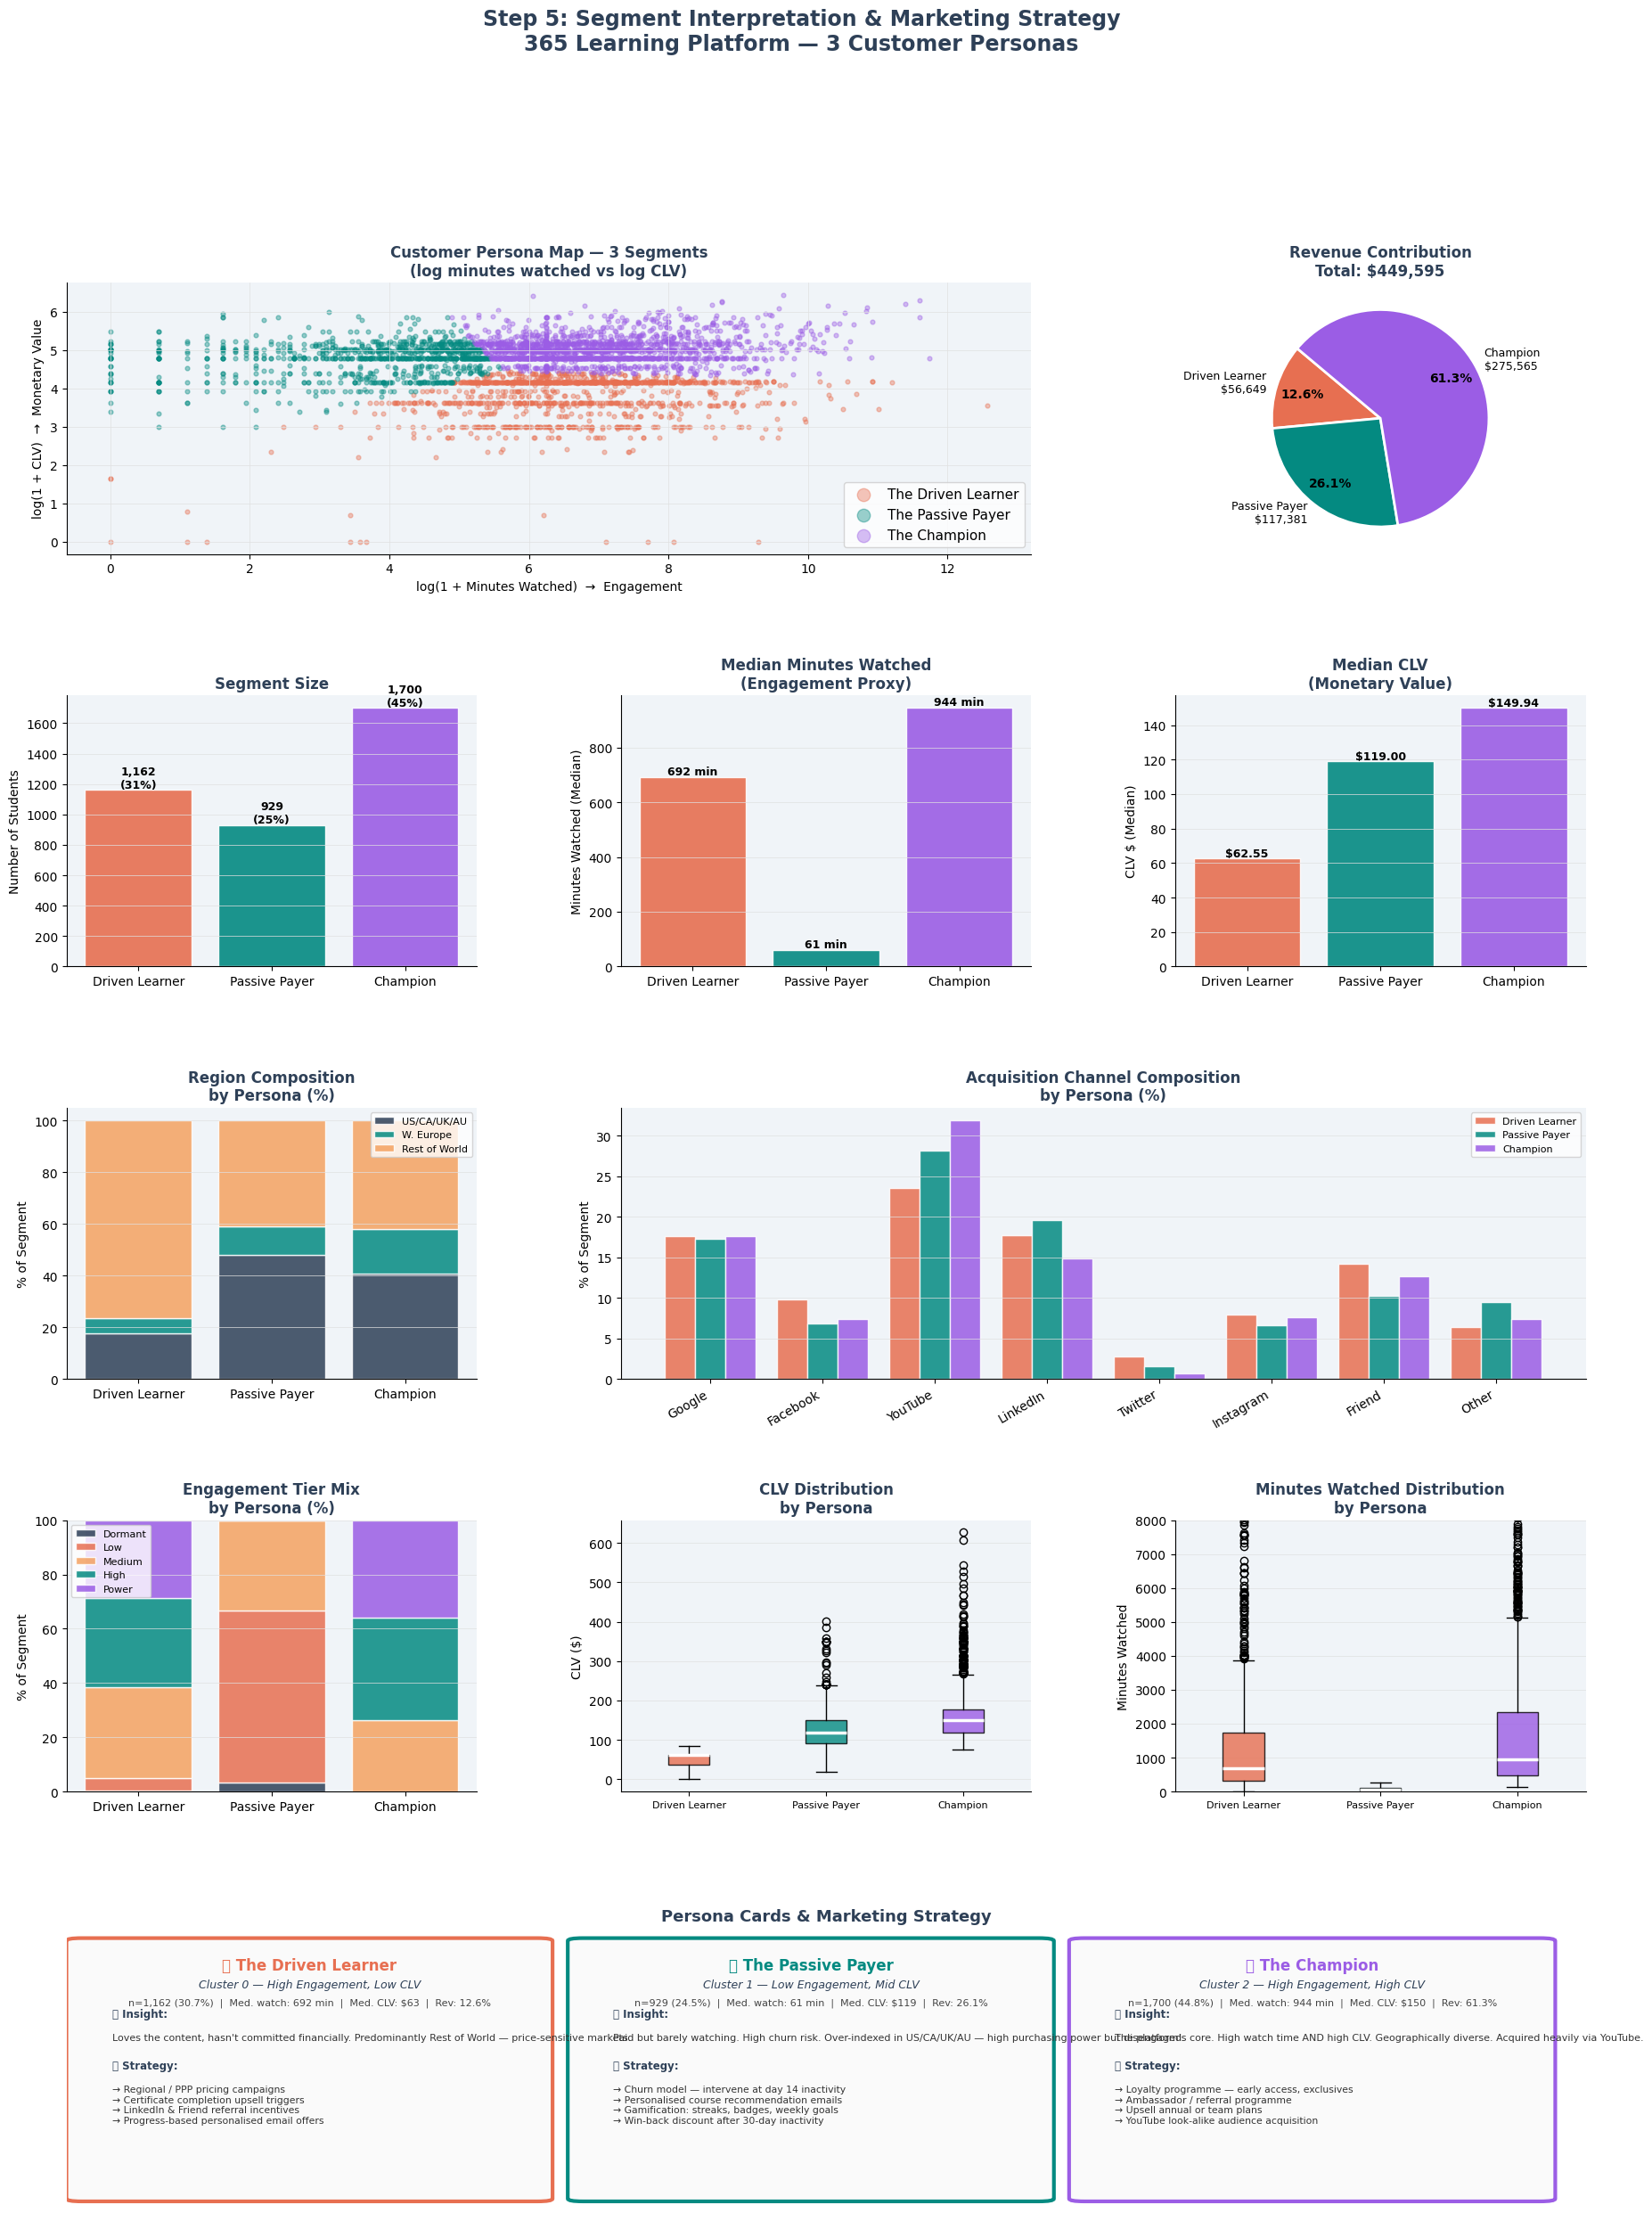


Dashboard saved → persona_strategy_dashboard.png


In [27]:
COLORS = {'primary': '#2E4057', 'light': '#F0F4F8', 'grid': '#E0E0E0'}
PC     = [PERSONA_COLORS[i] for i in range(3)]    # indexed list
PS     = {0: 'Driven Learner', 1: 'Passive Payer', 2: 'Champion'}

fig = plt.figure(figsize=(22, 28), facecolor='white')
fig.suptitle('Step 5: Segment Interpretation & Marketing Strategy\n'
             '365 Learning Platform — 3 Customer Personas',
             fontsize=17, fontweight='bold', color=COLORS['primary'], y=0.99)
gs  = gridspec.GridSpec(5, 3, figure=fig, hspace=0.52, wspace=0.35)

# ── Plot 1: Persona Map ───────────────────────────────────────────────────────
ax1 = fig.add_subplot(gs[0, :2])
for c in range(3):
    mask = df['cluster'] == c
    ax1.scatter(df.loc[mask, 'log_minutes_watched'], df.loc[mask, 'log_clv'],
                c=PC[c], s=12, alpha=0.4, label=PERSONA_MAP[c])
ax1.set_title('Customer Persona Map — 3 Segments\n'
              '(log minutes watched vs log CLV)',
              fontweight='bold', color=COLORS['primary'])
ax1.set_xlabel('log(1 + Minutes Watched)  →  Engagement')
ax1.set_ylabel('log(1 + CLV)  →  Monetary Value')
ax1.legend(fontsize=11, markerscale=3)
ax1.set_facecolor(COLORS['light'])
ax1.grid(color=COLORS['grid'], lw=0.5)
ax1.spines[['top', 'right']].set_visible(False)

# ── Plot 2: Revenue Contribution Pie ─────────────────────────────────────────
ax2 = fig.add_subplot(gs[0, 2])
rev   = [df[df['cluster'] == c]['CLV'].sum() for c in range(3)]
total = sum(rev)
wedges, texts, autotexts = ax2.pie(
    rev,
    labels=[f"{PS[c]}\n${rev[c]:,.0f}" for c in range(3)],
    colors=PC, autopct='%1.1f%%', startangle=140, pctdistance=0.75,
    wedgeprops=dict(edgecolor='white', linewidth=2)
)
for at in autotexts: at.set_fontsize(10); at.set_fontweight('bold')
for t in texts:      t.set_fontsize(9)
ax2.set_title(f'Revenue Contribution\nTotal: ${total:,.0f}',
              fontweight='bold', color=COLORS['primary'])

# ── Plot 3: Segment Size ──────────────────────────────────────────────────────
ax3 = fig.add_subplot(gs[1, 0])
sizes = [df[df['cluster'] == c].shape[0] for c in range(3)]
bars  = ax3.bar([PS[c] for c in range(3)], sizes,
                color=PC, edgecolor='white', alpha=0.9)
for bar, v in zip(bars, sizes):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15,
             f'{v:,}\n({v/sum(sizes)*100:.0f}%)',
             ha='center', fontsize=9, fontweight='bold')
ax3.set_title('Segment Size', fontweight='bold', color=COLORS['primary'])
ax3.set_ylabel('Number of Students')
ax3.set_facecolor(COLORS['light'])
ax3.grid(axis='y', color=COLORS['grid'], lw=0.5)
ax3.spines[['top', 'right']].set_visible(False)

# ── Plot 4: Median Minutes Watched ───────────────────────────────────────────
ax4 = fig.add_subplot(gs[1, 1])
med_mins = [df[df['cluster'] == c]['minutes_watched'].median() for c in range(3)]
bars2 = ax4.bar([PS[c] for c in range(3)], med_mins,
                color=PC, edgecolor='white', alpha=0.9)
for bar, v in zip(bars2, med_mins):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{v:,.0f} min', ha='center', fontsize=9, fontweight='bold')
ax4.set_title('Median Minutes Watched\n(Engagement Proxy)',
              fontweight='bold', color=COLORS['primary'])
ax4.set_ylabel('Minutes Watched (Median)')
ax4.set_facecolor(COLORS['light'])
ax4.grid(axis='y', color=COLORS['grid'], lw=0.5)
ax4.spines[['top', 'right']].set_visible(False)

# ── Plot 5: Median CLV ────────────────────────────────────────────────────────
ax5 = fig.add_subplot(gs[1, 2])
med_clv = [df[df['cluster'] == c]['CLV'].median() for c in range(3)]
bars3 = ax5.bar([PS[c] for c in range(3)], med_clv,
                color=PC, edgecolor='white', alpha=0.9)
for bar, v in zip(bars3, med_clv):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'${v:,.2f}', ha='center', fontsize=9, fontweight='bold')
ax5.set_title('Median CLV\n(Monetary Value)',
              fontweight='bold', color=COLORS['primary'])
ax5.set_ylabel('CLV $ (Median)')
ax5.set_facecolor(COLORS['light'])
ax5.grid(axis='y', color=COLORS['grid'], lw=0.5)
ax5.spines[['top', 'right']].set_visible(False)

# ── Plot 6: Region Composition ───────────────────────────────────────────────
ax6 = fig.add_subplot(gs[2, 0])
region_pct    = pd.crosstab(df['cluster'],
                             df['region'].map(REGION_MAP),
                             normalize='index') * 100
region_labels = ['US/CA/UK/AU', 'W. Europe', 'Rest of World']
region_cols   = ['#2E4057', '#048A81', '#F4A261']
bottom = np.zeros(3)
for i, reg in enumerate(region_labels):
    vals = region_pct[reg].values if reg in region_pct.columns else np.zeros(3)
    ax6.bar([PS[c] for c in range(3)], vals, bottom=bottom,
            color=region_cols[i], label=reg, edgecolor='white', alpha=0.85)
    bottom += vals
ax6.set_title('Region Composition\nby Persona (%)',
              fontweight='bold', color=COLORS['primary'])
ax6.set_ylabel('% of Segment')
ax6.legend(fontsize=8, loc='upper right')
ax6.set_facecolor(COLORS['light'])
ax6.grid(axis='y', color=COLORS['grid'], lw=0.5)
ax6.spines[['top', 'right']].set_visible(False)

# ── Plot 7: Channel Composition ──────────────────────────────────────────────
ax7 = fig.add_subplot(gs[2, 1:])
ch_pct  = pd.crosstab(df['cluster'],
                       df['channel'].map(CHANNEL_MAP),
                       normalize='index') * 100
ch_list = [CHANNEL_MAP[c] for c in range(1, 9)]
x, w    = np.arange(len(ch_list)), 0.27
for i in range(3):
    row  = ch_pct.loc[i] if i in ch_pct.index else pd.Series(0, index=ch_list)
    vals = [row.get(ch, 0) for ch in ch_list]
    ax7.bar(x + (i - 1) * w, vals, w, color=PC[i],
            label=PS[i], edgecolor='white', alpha=0.85)
ax7.set_xticks(x); ax7.set_xticklabels(ch_list, rotation=30, ha='right')
ax7.set_title('Acquisition Channel Composition\nby Persona (%)',
              fontweight='bold', color=COLORS['primary'])
ax7.set_ylabel('% of Segment')
ax7.legend(fontsize=8)
ax7.set_facecolor(COLORS['light'])
ax7.grid(axis='y', color=COLORS['grid'], lw=0.5)
ax7.spines[['top', 'right']].set_visible(False)

# ── Plot 8: Engagement Tier Stacked ──────────────────────────────────────────
ax8 = fig.add_subplot(gs[3, 0])
eng_pct    = pd.crosstab(df['cluster'],
                          df['engagement_tier'].map(ENG_MAP),
                          normalize='index') * 100
eng_tiers  = ['Dormant', 'Low', 'Medium', 'High', 'Power']
eng_colors = ['#2E4057', '#E76F51', '#F4A261', '#048A81', '#9B5DE5']
bottom = np.zeros(3)
for i, tier in enumerate(eng_tiers):
    vals = eng_pct[tier].values if tier in eng_pct.columns else np.zeros(3)
    ax8.bar([PS[c] for c in range(3)], vals, bottom=bottom,
            color=eng_colors[i], label=tier, edgecolor='white', alpha=0.85)
    bottom += vals
ax8.set_title('Engagement Tier Mix\nby Persona (%)',
              fontweight='bold', color=COLORS['primary'])
ax8.set_ylabel('% of Segment')
ax8.legend(fontsize=8, loc='upper left')
ax8.set_facecolor(COLORS['light'])
ax8.grid(axis='y', color=COLORS['grid'], lw=0.5)
ax8.spines[['top', 'right']].set_visible(False)

# ── Plot 9: CLV Distribution Boxplot ─────────────────────────────────────────
ax9 = fig.add_subplot(gs[3, 1])
data_clv = [df[df['cluster'] == c]['CLV'].values for c in range(3)]
bp = ax9.boxplot(data_clv, patch_artist=True,
                 medianprops=dict(color='white', linewidth=2.5))
for patch, color in zip(bp['boxes'], PC):
    patch.set_facecolor(color); patch.set_alpha(0.8)
ax9.set_xticklabels([PS[c] for c in range(3)], fontsize=8)
ax9.set_title('CLV Distribution\nby Persona', fontweight='bold', color=COLORS['primary'])
ax9.set_ylabel('CLV ($)')
ax9.set_facecolor(COLORS['light'])
ax9.grid(axis='y', color=COLORS['grid'], lw=0.5)
ax9.spines[['top', 'right']].set_visible(False)

# ── Plot 10: Minutes Watched Boxplot ─────────────────────────────────────────
ax10 = fig.add_subplot(gs[3, 2])
data_min = [df[df['cluster'] == c]['minutes_watched'].values for c in range(3)]
bp2 = ax10.boxplot(data_min, patch_artist=True,
                   medianprops=dict(color='white', linewidth=2.5))
for patch, color in zip(bp2['boxes'], PC):
    patch.set_facecolor(color); patch.set_alpha(0.8)
ax10.set_xticklabels([PS[c] for c in range(3)], fontsize=8)
ax10.set_title('Minutes Watched Distribution\nby Persona',
               fontweight='bold', color=COLORS['primary'])
ax10.set_ylabel('Minutes Watched')
ax10.set_ylim(0, 8000)
ax10.set_facecolor(COLORS['light'])
ax10.grid(axis='y', color=COLORS['grid'], lw=0.5)
ax10.spines[['top', 'right']].set_visible(False)

# ── Plot 11: Persona Cards ────────────────────────────────────────────────────
ax11 = fig.add_subplot(gs[4, :])
ax11.axis('off')

CARDS = {
    0: {
        'name'    : '🎯 The Driven Learner',
        'sub'     : 'Cluster 0 — High Engagement, Low CLV',
        'stats'   : 'n=1,162 (30.7%)  |  Med. watch: 692 min  |  Med. CLV: $63  |  Rev: 12.6%',
        'insight' : 'Loves the content, hasn\'t committed financially. Predominantly Rest of World — price-sensitive markets.',
        'strategy': '→ Regional / PPP pricing campaigns\n'
                    '→ Certificate completion upsell triggers\n'
                    '→ LinkedIn & Friend referral incentives\n'
                    '→ Progress-based personalised email offers',
    },
    1: {
        'name'    : '💤 The Passive Payer',
        'sub'     : 'Cluster 1 — Low Engagement, Mid CLV',
        'stats'   : 'n=929 (24.5%)  |  Med. watch: 61 min  |  Med. CLV: $119  |  Rev: 26.1%',
        'insight' : 'Paid but barely watching. High churn risk. Over-indexed in US/CA/UK/AU — high purchasing power but disengaged.',
        'strategy': '→ Churn model — intervene at day 14 inactivity\n'
                    '→ Personalised course recommendation emails\n'
                    '→ Gamification: streaks, badges, weekly goals\n'
                    '→ Win-back discount after 30-day inactivity',
    },
    2: {
        'name'    : '🏆 The Champion',
        'sub'     : 'Cluster 2 — High Engagement, High CLV',
        'stats'   : 'n=1,700 (44.8%)  |  Med. watch: 944 min  |  Med. CLV: $150  |  Rev: 61.3%',
        'insight' : 'The platform\'s core. High watch time AND high CLV. Geographically diverse. Acquired heavily via YouTube.',
        'strategy': '→ Loyalty programme — early access, exclusives\n'
                    '→ Ambassador / referral programme\n'
                    '→ Upsell annual or team plans\n'
                    '→ YouTube look-alike audience acquisition',
    },
}

for i, (c, card) in enumerate(CARDS.items()):
    x = 0.01 + i * 0.33
    rect = FancyBboxPatch((x, 0.02), 0.30, 0.95,
                           boxstyle="round,pad=0.01", linewidth=3,
                           edgecolor=PC[c], facecolor='#FAFAFA',
                           transform=ax11.transAxes)
    ax11.add_patch(rect)
    ax11.text(x + 0.15, 0.91, card['name'], ha='center', va='top',
              fontsize=12, fontweight='bold', color=PC[c],
              transform=ax11.transAxes)
    ax11.text(x + 0.15, 0.83, card['sub'], ha='center', va='top',
              fontsize=9, color=COLORS['primary'], style='italic',
              transform=ax11.transAxes)
    ax11.text(x + 0.15, 0.76, card['stats'], ha='center', va='top',
              fontsize=8, color='#444444', transform=ax11.transAxes)
    ax11.text(x + 0.02, 0.69, '📊 Insight:', fontsize=8.5,
              fontweight='bold', color=COLORS['primary'],
              transform=ax11.transAxes)
    ax11.text(x + 0.02, 0.63, card['insight'], fontsize=8,
              color='#333333', transform=ax11.transAxes,
              verticalalignment='top', multialignment='left')
    ax11.text(x + 0.02, 0.50, '📣 Strategy:', fontsize=8.5,
              fontweight='bold', color=COLORS['primary'],
              transform=ax11.transAxes)
    ax11.text(x + 0.02, 0.44, card['strategy'], fontsize=7.8,
              color='#333333', transform=ax11.transAxes,
              verticalalignment='top', multialignment='left')

ax11.set_title('Persona Cards & Marketing Strategy',
               fontweight='bold', color=COLORS['primary'], fontsize=13, pad=10)

plt.savefig('persona_strategy_dashboard.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()
print("\nDashboard saved → persona_strategy_dashboard.png")